## Домашнее задание №3

<ol>
    <li>Попробуйте обучить нейронную сеть на TensorFlow 2 на любом датасете imdb_reviews. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br><br>
    </li>
    <li>* Поработайте с документацией TensorFlow 2. Найдите полезные команды не разобранные на уроке.</li>
    
    
</ol>

### Загрузка модулей

In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


### Загрузка данных

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Анализ данных

In [5]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
len(train_labels), len(test_labels)

(60000, 10000)

In [7]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

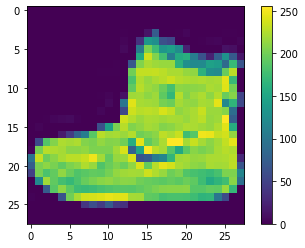

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

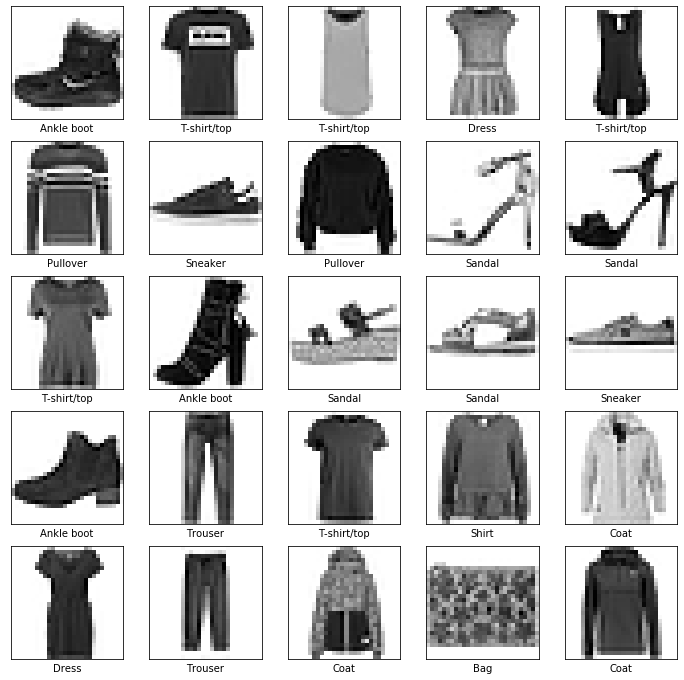

In [10]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Создание модели

In [11]:
# 3 слоя нейронов (определение графа нейросети)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
])

In [12]:
# компиляция модели (определение метрик нейросети)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Обучение модели

In [14]:
model.fit(train_images, train_labels, batch_size=256, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5832 - accuracy: 0.7990
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3966 - accuracy: 0.8578
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3562 - accuracy: 0.8717
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3311 - accuracy: 0.8811
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3129 - accuracy: 0.8857
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2973 - accuracy: 0.8922
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2836 - accuracy: 0.8953
Epoch 8/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2726 - accuracy: 0.9002
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2644 - accuracy: 0.9022
Epoch 10/10
60

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3275 - accuracy: 0.8805

Test accuracy: 0.8805


### Предсказания модели

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([5.4182419e-06, 5.3729809e-06, 4.6330465e-06, 1.0018434e-06,
       6.4612536e-06, 3.1710898e-03, 1.1736647e-05, 2.7596993e-02,
       6.2787245e-07, 9.6919662e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

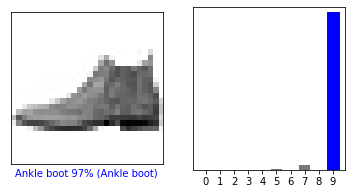

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

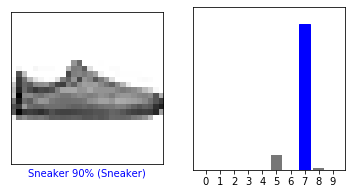

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

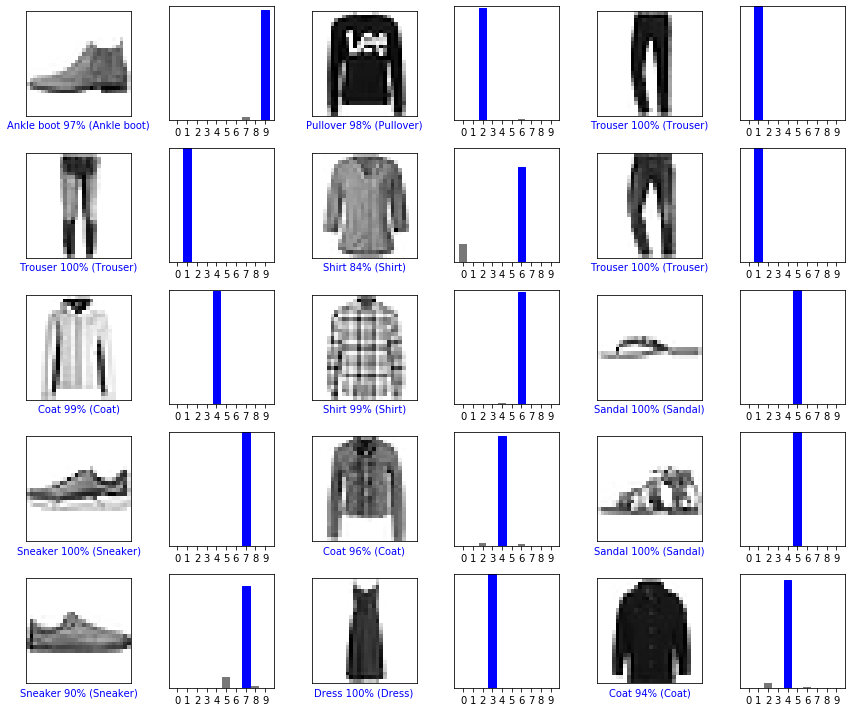

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Использование обученной модели

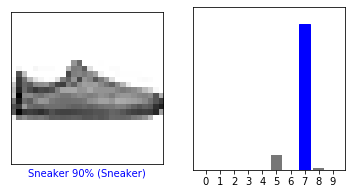

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [26]:
img = test_images[12]

print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.8337805e-06 8.4439169e-05 6.8618801e-06 1.6988961e-05 3.5083324e-06
  9.1159292e-02 2.7195874e-06 8.9635378e-01 1.2309944e-02 5.2610460e-05]]


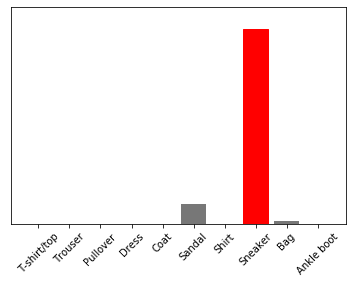

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

7

## Выводы

1.

В ходе выполнения домашнего задания были выполнены следующие действия:
    
    - во-первых, изменение графа нейронной сети, а именно добавление ещё одного внутреннего слоя, привело
      к увеличению точности определения класса объекта изображения, как следствие того, что увеличение количества
      слоёв привело к усложнению нейронных взаимосвязей и распределению весов в них для данного датасета;
    - во-вторых, увеличение количества эпох обучения, также увеличело точность предсказания на тестовой выборке,
      за счёт уменьшения loss ошибки и более сбалансированного распределения весов;
    - в-третьих, увеличение размера batch_size позволило увеличить скорость обучения, за счёт уменьшения количества
      итераций на выполнение 1 эпохи обучения.
      

P.S. не ясными для меня остались вопросы: 1) почему при перезапуске меняется точность предсказания и как её 
зафиксировать?; 2) Почему в 28 строке предсказанный класс обозначен красным цветом?


2.

EarlyStopping callback - проверяет показатели обучения после каждой эпохи, усли после определенного количество эпох нет никаких улучшений, то функция автоматически остановит обучение.